
# WNS Analytics Wizard 2018

## Problem Statement
A large multinational corporation seeks to optimize their promotion process for manager positions and below across their 9 broad verticals.

## Current Process Challenge
The existing promotion workflow faces efficiency issues:

1. **Initial Selection**
   * Candidates identified through recommendations
   * Past performance evaluation considered

2. **Training & Evaluation**
   * Vertical-specific training programs
   * Each vertical has unique skill requirements
   * Separate evaluation processes

3. **Promotion Criteria**
   * Training performance assessment
   * KPI completion rate (minimum 60% required)
   * Various other performance factors

## Key Business Challenge
> The current system announces promotions only after complete evaluation, causing significant delays in role transitions.

## Project Objective
Help the organization identify eligible candidates at specific checkpoints to:
* Expedite the promotion process
* Enable faster role transitions
* Optimize talent pipeline management

---
**Note**: The solution will focus on developing a predictive model to identify promotion-ready  modify any part of this formatting?motion

# Dataset Features
## Our dataset contains the following columns:

* employee_id: Unique identifier for each employee
* department: Department of the employee                       
* region: Region code (region_1 to region_34)                  
* education: Education level                                   
* gender: Employee gender (m/f)                                
* recruitment_channel: How the employee was recruited          
* no_of_trainings: Number of training programs completed       
* age: Employee's age                                          
* previous_year_rating: Last year's performance rating         
* length_of_service: Years in the company                      
* KPIs_met >80%: Whether KPIs were met above 80% (0/1)         
* awards_won?: If employee won awards (0/1)                    
* avg_training_score: Average score in trainings               
* is_promoted: Target variable - if employee was promoted (0/1)oted (0/1)* moted (0/1)*

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn as sns

# For visualization settings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df_train = pd.read_csv('train_promotion.csv')
df_test = pd.read_csv('test_promotion.csv')




In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df_train.head())


First 5 rows of the dataset:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
print("\nDataset Information:")
df_train.dtypes


Dataset Information:


employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [5]:
# Rows and columns count in each training and test data set
df_train.shape, df_test.shape

((54808, 14), (23490, 13))

In [6]:
# check missing data
df_train.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
df_train.isna().sum()/df_train.shape[0]*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [8]:
# to check duplicates
df_train.duplicated().sum()

np.int64(0)

In [9]:
# check Kpi data
df_train["KPIs_met >80%"].value_counts()

KPIs_met >80%
0    35517
1    19291
Name: count, dtype: int64

In [10]:
# check Awards data
df_train["awards_won?"].value_counts()


awards_won?
0    53538
1     1270
Name: count, dtype: int64

In [11]:
# check previously promoted data
df_train["is_promoted"].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [12]:
# Normalization of target columns - involving all 3 columns in a chart for easy representation
# Print percentage distributions
print("\nPercentage Distributions:")
for col in ['is_promoted', 'KPIs_met >80%', 'awards_won?']:
    print(f"\n{col}:")
    print(df_train[col].value_counts(normalize=True).round(3) * 100, "%")


Percentage Distributions:

is_promoted:
is_promoted
0    91.5
1     8.5
Name: proportion, dtype: float64 %

KPIs_met >80%:
KPIs_met >80%
0    64.8
1    35.2
Name: proportion, dtype: float64 %

awards_won?:
awards_won?
0    97.7
1     2.3
Name: proportion, dtype: float64 %


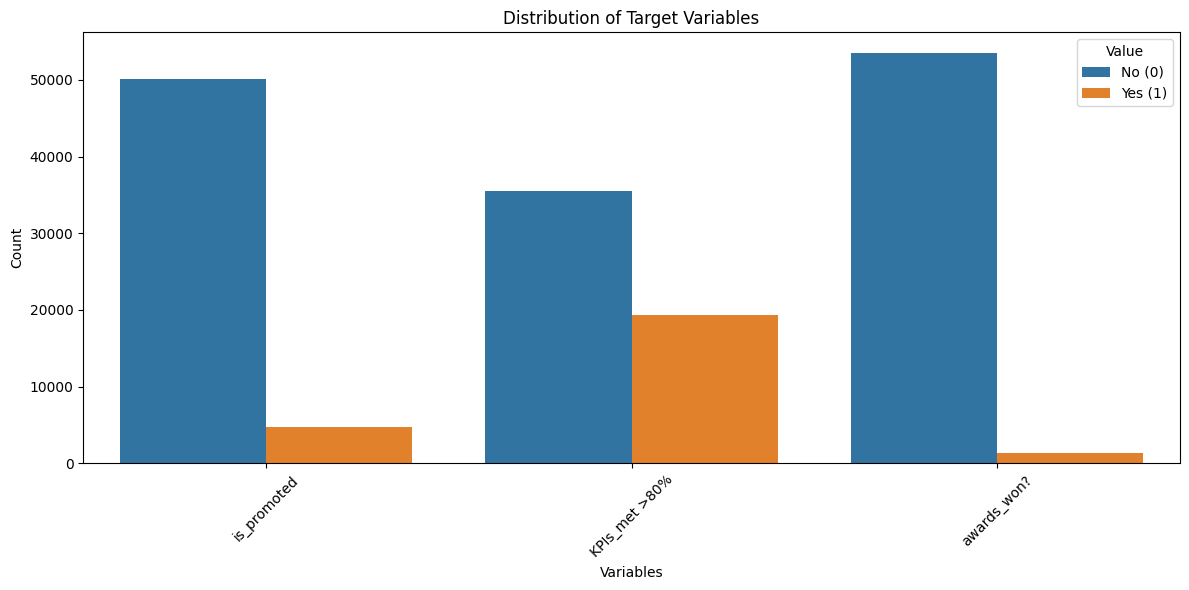

In [13]:
# Option 2: Combined Plot using melted dataframe
# Select only the target columns
target_cols = ['is_promoted', 'KPIs_met >80%', 'awards_won?']
df_melted = df_train[target_cols].melt()

# Convert value column to string type
df_melted['value'] = df_melted['value'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='variable', hue='value')
plt.title('Distribution of Target Variables')
plt.xlabel('Variables')
plt.ylabel('Count')
plt.legend(title='Value', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# is_promoted and awards_won seems to be imbalanced dataset

In [14]:
target_col = ['is_promoted']
ignore_cols = ['employee_id','awards_won?']

In [15]:
# statistical info
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [16]:
df_train.drop(columns=ignore_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [17]:
df_train.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [18]:
df_train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [19]:
# check unique values

for col in df_train.drop(columns=ignore_cols).columns:
    print(col,df_train[col].nunique(),  '=>', df_train[col].unique())

department 9 => ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
region 34 => ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
education 3 => ["Master's & above" "Bachelor's" nan 'Below Secondary']
gender 2 => ['f' 'm']
recruitment_channel 3 => ['sourcing' 'other' 'referred']
no_of_trainings 10 => [ 1  2  3  4  7  5  6  8 10  9]
age 41 => [35 30 34 39 45 31 33 28 32 49 37 38 41 27 29 26 24 57 40 42 23 59 44 50
 56 20 25 47 36 46 60 43 22 54 58 48 53 55 51 52 21]
previous_year_rating 5 => [ 5.  3.  1.  4. nan  2.]
length_of_service 35 => [ 8  4  7 10  2  5  6  1  3 16  9 11 26 12 17

In [20]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='avg_training_score', ylabel='Density'>

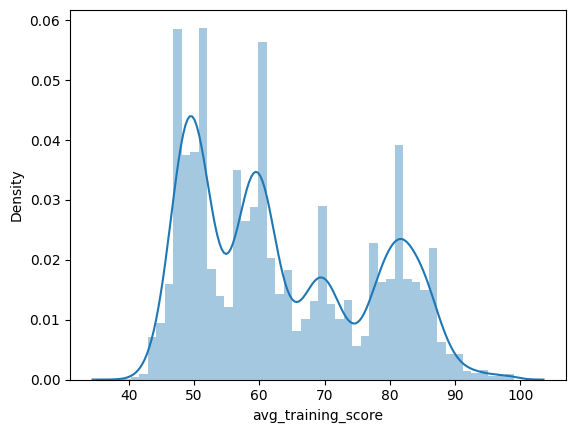

In [21]:
sns.distplot(df_train.avg_training_score)

## Distribution Shape:

* It's a multimodal distribution (shows multiple peaks)
* Not normally distributed (not a single bell curve)

## Score Range:

* Scores range from approximately 40 to 100
* Most scores fall between 45 and 90

# Peak Areas:

* First major peak around 50-55 (highest density)
* Second peak around 60-65
* Third peak around 80-85
* Lower frequency of scores above 90 or below 45

# Insights:

* The multiple peaks might suggest different groups of performers or different training programs
* There's a high concentration of scores in the 50-55 range, suggesting this might be a common performance level
* Very few employees score above 90 or below 45, indicating these are exceptional cases
* The distribution suggests there might be natural groupings of performers (low, medium, high)

<Axes: xlabel='age', ylabel='Density'>

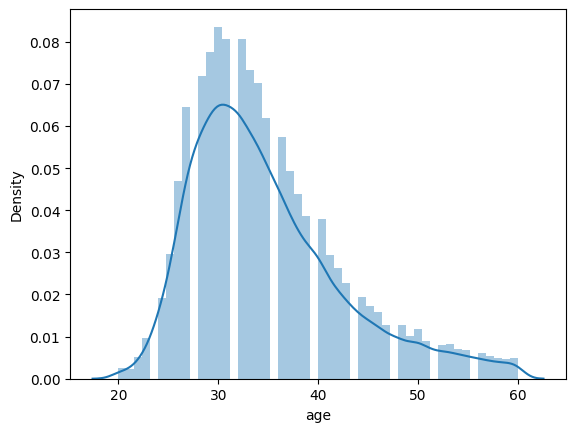

In [22]:
sns.distplot(df_train.age)

# This age distribution graph shows several important insights about the employee age demographics:

1. **Distribution Shape**:
   - Right-skewed distribution (tail extends to the right)
   - Single peak (unimodal)
   - Not perfectly symmetrical

2. **Age Range**:
   - Minimum age: around 20 years
   - Maximum age: around 60 years
   - Peak concentration: between 30-35 years

3. **Key Observations**:
   - Highest concentration of employees are in their early 30s
   - Gradually decreasing frequency as age increases
   - Relatively fewer employees above 45
   - Very few employees at the extremes (below 25 or above 55)

4. **Workforce Insights**:
   - Company has a relatively young workforce
   - Mid-career professionals (30-35) form the majority
   - Senior employees (50+) are less common
   - Very few frs with other performance metrics?

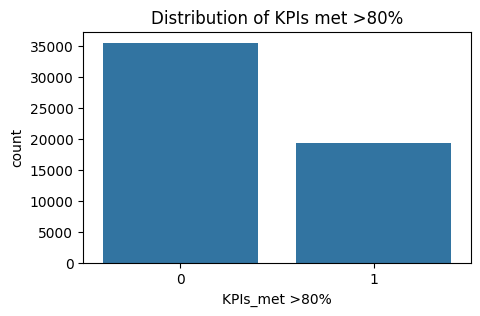

In [23]:
# KPI plot
plt.figure(figsize=(5,3))
sns.countplot(data=df_train, x='KPIs_met >80%')
plt.title('Distribution of KPIs met >80%')
plt.show()


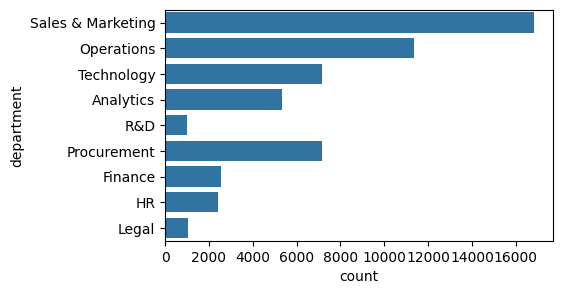

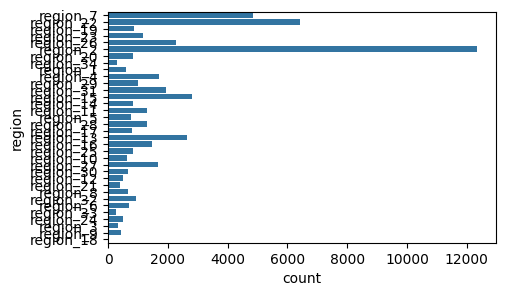

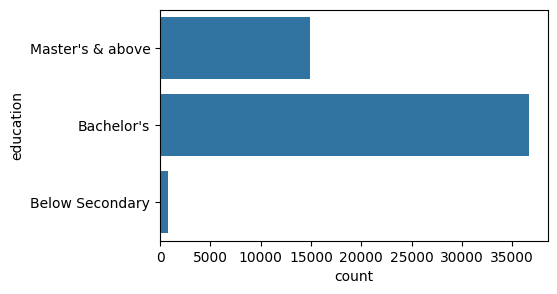

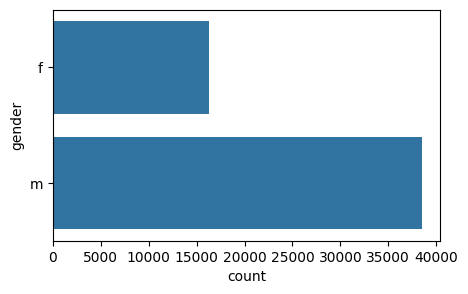

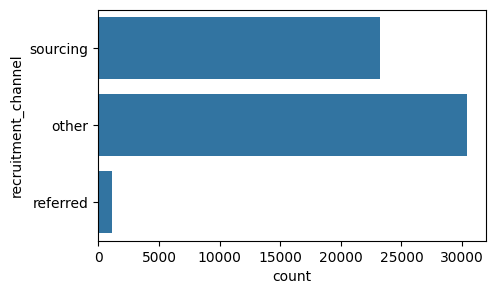

In [24]:
for col in df_train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=df_train[col])
    plt.show()


1. **Department Distribution**:
- Sales & Marketing is the largest department
- Shows a very uneven distribution across departments

2. **Region Distribution**:
- Shows multiple regions (region_1 to region_34)
- One region (appears to be region_2) has significantly higher count
- Most regions have relatively smaller populations
- Highly imbalanced distribution across regions

3. **Education Level Distribution**:
- Bachelor's degree holders form the majority

4. **Gender Distribution**:
- Male (m) employees significantly outnumber female (f) employees
- Approximately 2:1 ratio in favor of males

5. **Recruitment Channel Distribution**:
- Two main channels: 'other' and 'sourcing'
- Other slightly higher than 'sourcing'
- Referred is very minimal

Key Insights:
1. Organization is sales-driven (large Sales & Marketing department)
2. Strong regional concentration
3. Highly educated workforce (predominantly Bachelor's degree holders)
4. Gender diversity needs attention
5. Structured recruitment process with established channels


In [25]:
exp_tgt = df_train[['KPIs_met >80%','is_promoted']].groupby('KPIs_met >80%').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)


is_promoted,0,1,%
KPIs_met >80%,,,
1,16029,3262,16.909440
0,34111,1406,3.958668


In [26]:
exp_tgt = df_train[['department','is_promoted']].groupby('department').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)


is_promoted,0,1,%
department,,,
Technology,6370,768,10.759316
Procurement,6450,688,9.638554
Analytics,4840,512,9.566517
Operations,10325,1023,9.014804
Finance,2330,206,8.123028
Sales & Marketing,15627,1213,7.203088
R&D,930,69,6.906907
HR,2282,136,5.624483
Legal,986,53,5.101059


In [27]:
exp_tgt = df_train[['education','is_promoted']].groupby('education').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)


is_promoted,0,1,%
education,,,
Master's & above,13454,1471,9.855946
Below Secondary,738,67,8.322981
Bachelor's,33661,3008,8.203114


In [28]:
exp_tgt = df_train[['gender','is_promoted']].groupby('gender').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)


is_promoted,0,1,%
gender,,,
f,14845,1467,8.993379
m,35295,3201,8.315150


In [29]:
exp_tgt = df_train[['recruitment_channel','is_promoted']].groupby('recruitment_channel').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)


is_promoted,0,1,%
recruitment_channel,,,
referred,1004,138,12.084063
sourcing,21246,1974,8.501292
other,27890,2556,8.395191


# Key Insights:

* KPI achievement is the strong predictor for promotions with 16% got promoted who have met KPI while 3.9% not got promoted who have not met KPI.
* Most promotions happens in the "Technology" Department
* Likely promotions occurs through Master's education qualification.


# Preprocessing



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [31]:
df_train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [32]:
# Seperating categorical and numeric features

cat_cols = ['department', 'region', 'education', 'gender',
            'recruitment_channel']

num_cols = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','avg_training_score']

In [33]:
print(target_col, ignore_cols, cat_cols, num_cols, sep='\n')

['is_promoted']
['employee_id', 'awards_won?']
['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'avg_training_score']


In [34]:
# Pipelining

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [35]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])

In [36]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [37]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [38]:
X = df_train.drop(columns=ignore_cols+target_col)
X.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60


In [39]:
y = df_train[target_col]
y.head(2)

,is_promoted
0,0
1,0


# train test split

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [41]:
train_X, val_X, train_y, val_y = train_test_split(X,y,
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((49327, 11), (5481, 11), (49327, 1), (5481, 1))

In [42]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [43]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression())])

In [44]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[0.99343679, 0.00656321],
       [0.98615219, 0.01384781],
       [0.95622009, 0.04377991],
       ...,
       [0.9407926 , 0.0592074 ],
       [0.95076573, 0.04923427],
       [0.97651973, 0.02348027]])

In [45]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.99343679, 0.98615219, 0.95622009, ..., 0.9407926 , 0.95076573,
       0.97651973])

In [46]:
# predict target

model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):

    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

Train AUC
0.6226520891555467
Valid AUC
0.6271581172038317
Train cnf_matrix
[[44849   241]
 [ 3175  1062]]
Valid cnf_matrix
[[5022   28]
 [ 319  112]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     45090
           1       0.82      0.25      0.38      4237

    accuracy                           0.93     49327
   macro avg       0.87      0.62      0.67     49327
weighted avg       0.92      0.93      0.91     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5050
           1       0.80      0.26      0.39       431

    accuracy                           0.94      5481
   macro avg       0.87      0.63      0.68      5481
weighted avg       0.93      0.94      0.92      5481



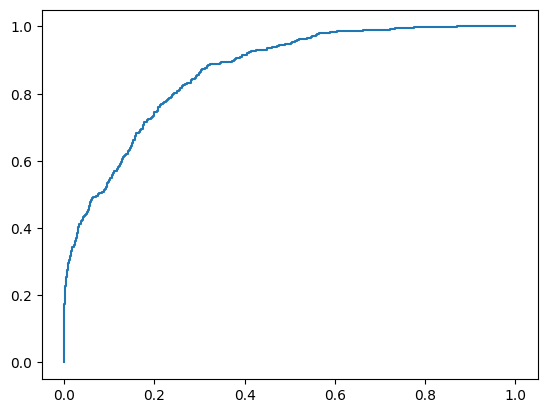

In [48]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

# Using GridSearch to hyper tune single model

In [49]:
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }
]
'''
myidea():
    a,
    b

myidea.a
myidea.b

myidea__a
myidea__b
'''

'\nmyidea():\n    a,\n    b\n\nmyidea.a\nmyidea.b\n\nmyidea__a\nmyidea__b\n'

In [50]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params,
                    cv=2, scoring='roc_auc')

In [51]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [52]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}

In [53]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.869576,1
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.866504,3
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.867233,2
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.866504,3


In [54]:
# read the submission file
#predict with the last model
#and upload into the hack website

sub = pd.read_csv('sample_submission_promotion.csv')
sub.head(3)

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0


In [55]:
df_test.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


In [56]:
df_train.columns.difference(df_test.columns)

Index(['is_promoted'], dtype='object')

In [57]:
# updating the existing target values with predicted values
sub['is_promoted'] = model_pipeline.predict(df_test)

In [58]:
sub.to_csv('sub_1.csv',index=False)

In [59]:
sub

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [60]:
# pickling the model

In [61]:
import joblib

In [62]:
joblib.dump(model_pipeline,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [63]:
#perform oversampling to balance the dataset

In [64]:
from imblearn.over_sampling import RandomOverSampler

In [65]:
%pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [66]:
over_sampling = RandomOverSampler()

In [67]:
import imblearn
imblearn.__version__

'0.12.4'

In [68]:
import sklearn
sklearn.__version__

'1.5.1'

In [69]:
train_y.value_counts()

is_promoted
0              45090
1               4237
Name: count, dtype: int64

In [70]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [71]:
train_y_os.value_counts()

is_promoted
0              45090
1              45090
Name: count, dtype: int64

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Using GridSearch to hyper tune multi model

In [74]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]

#
#Ridge()
#Lasso()

In [75]:
params_2

[{'model': [LogisticRegression()],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [76]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2,
                    cv=2, scoring='roc_auc')

In [77]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [78]:
grid_2

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['no_of_trainings',
                                                                          'age',
                                                                          'previous_year_rating',
                                                                          'length_of_service',
                                                                          'KPIs_met '
                                                                          '>80%',
                                                                          'avg_training_score'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [79]:
grid_2.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}

In [80]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'avg_training_score'])])),
                ('model', LogisticRegression(C=0.5, penalty=None))])

In [81]:
grid_2.cv_results_

{'mean_fit_time': array([0.40152502, 0.45384169, 0.41531432, 0.3582406 , 0.29151654,
        0.32489812]),
 'std_fit_time': array([0.04922366, 0.01396847, 0.00070918, 0.00763941, 0.007061  ,
        0.00893724]),
 'mean_score_time': array([0.11392236, 0.13340557, 0.12413645, 0.11857402, 0.1243875 ,
        0.13179243]),
 'std_score_time': array([0.00485682, 0.00291288, 0.00790215, 0.01597464, 0.00896382,
        0.01493919]),
 'param_model': masked_array(data=[LogisticRegression(), LogisticRegression(),
                    LogisticRegression(), LogisticRegression(),
                    DecisionTreeClassifier(), DecisionTreeClassifier()],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3.0, 3.0, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value=1e+20),
 'param_model__penalty': masked_array(data=['l2', None, 'l2', None, --, -

In [82]:
new_model = grid_2.best_estimator_

Train AUC
0.7882851217293732
Valid AUC
0.7916349268337507
Train cnf_matrix
[[34277 10813]
 [  778  3459]]
Valid cnf_matrix
[[3836 1214]
 [  76  355]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     45090
           1       0.24      0.82      0.37      4237

    accuracy                           0.77     49327
   macro avg       0.61      0.79      0.61     49327
weighted avg       0.91      0.77      0.81     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      5050
           1       0.23      0.82      0.35       431

    accuracy                           0.76      5481
   macro avg       0.60      0.79      0.61      5481
weighted avg       0.92      0.76      0.82      5481



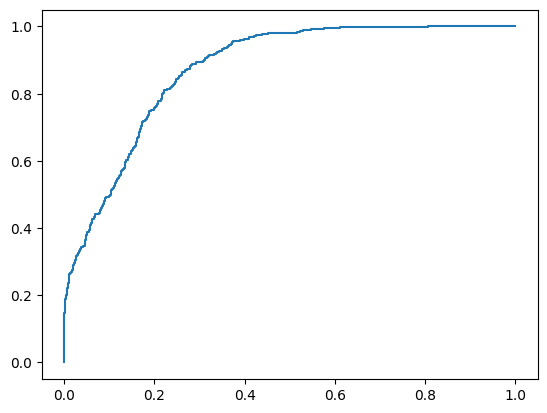

In [83]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.78797959636283
Valid AUC
0.7916349268337507
Train cnf_matrix
[[34277 10813]
 [ 8307 36783]]
Valid cnf_matrix
[[3836 1214]
 [  76  355]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     45090
           1       0.77      0.82      0.79     45090

    accuracy                           0.79     90180
   macro avg       0.79      0.79      0.79     90180
weighted avg       0.79      0.79      0.79     90180

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      5050
           1       0.23      0.82      0.35       431

    accuracy                           0.76      5481
   macro avg       0.60      0.79      0.61      5481
weighted avg       0.92      0.76      0.82      5481



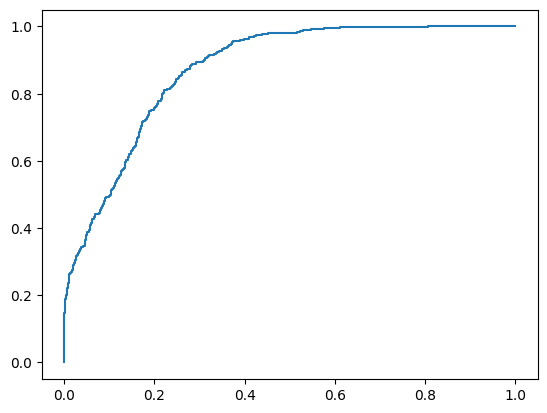

In [84]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

#model_train_val_eval(val_X,val_y,new_model)-- train_X

In [85]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.872422,4
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.872788,1
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.872728,3
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.872788,1
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.798652,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.851289,5


In [86]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model.predict(df_test)
sub.to_csv('sub_2.csv',index=False)

# Result in Anaytics vidhya for 2 solutions
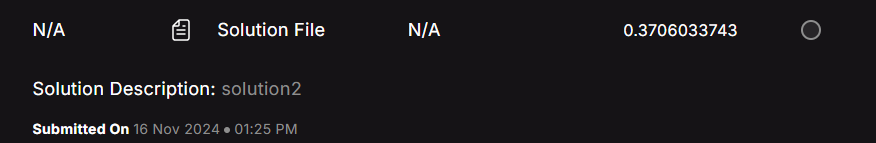


In [87]:
# Using GridSearch to hyper tune multi model along with ensembling


In [88]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier


In [89]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],
    'model__sclf3__n_estimators':[5,35],
    }

]

In [90]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3,
                    cv=2, scoring='roc_auc')

In [91]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['department',
                                                                          'region',
                                                                          'education',
                                                                          'gender',
                                                                          'recruitment_channel']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(...
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]},
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier()],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier()],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier()]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='roc_auc')

In [92]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()],
                                ['sclf2', GradientBoostingClassifier()],
                                ['sclf3', AdaBoostClassifier()]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 25,
 'model__sclf3__n_estimators': 5}

In [93]:
grid_3.best_estimator_


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['department', 'region',
                                                   'education', 'gender',
                                                   'recruitment_channel']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['no_of_trainings', 'age',
                                                   'previous_year_rating',
                                                   'length_of_service',
                                                   'KPIs_met >80%',
                                                   'avg_training_score'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=25)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=5)]],
                                    final_estimator=LogisticRegression()))])

In [94]:
new_model_3 = grid_3.best_estimator_

Train AUC
0.7903837697379478
Valid AUC
0.7834357124807608
Train cnf_matrix
[[31561 13529]
 [  505  3732]]
Valid cnf_matrix
[[3554 1496]
 [  59  372]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     45090
           1       0.22      0.88      0.35      4237

    accuracy                           0.72     49327
   macro avg       0.60      0.79      0.58     49327
weighted avg       0.92      0.72      0.78     49327

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.70      0.82      5050
           1       0.20      0.86      0.32       431

    accuracy                           0.72      5481
   macro avg       0.59      0.78      0.57      5481
weighted avg       0.92      0.72      0.78      5481



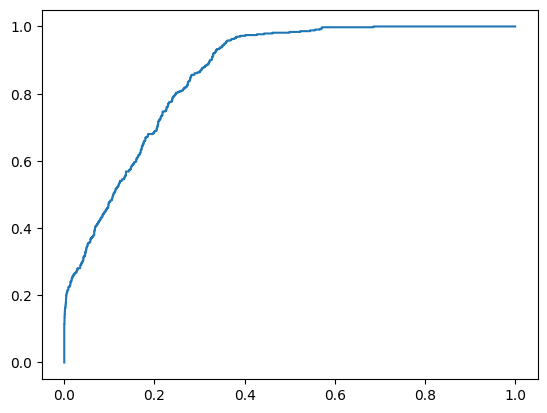

In [95]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_3)

In [96]:
res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.872422,5
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.872788,2
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.872728,4
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.872788,2
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.798652,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.851308,11
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 5}",0.833070,13
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 35}",0.842748,12
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 5}",0.856693,10
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier()], ['sclf2', GradientBoostingClassifier()], ['sclf3', AdaBoostClassifier()]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 35}",0.858333,9


In [97]:
# updating the existing target values with predicted values
sub['is_promoted'] = new_model_3.predict(df_test)
sub.to_csv('solution_3.csv',index=False)



```
# 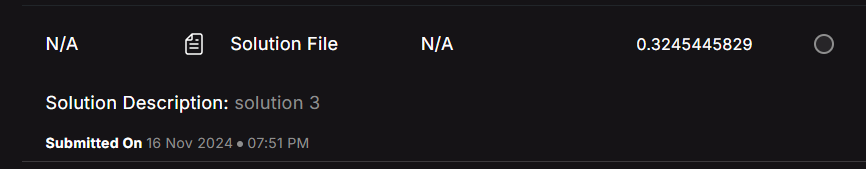This is formatted as code
```



In [98]:
joblib.dump(new_model_3,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [101]:
df_train.iloc[2]

employee_id                          7513
department              Sales & Marketing
region                          region_19
education                      Bachelor's
gender                                  m
recruitment_channel              sourcing
no_of_trainings                         1
age                                    34
previous_year_rating                  3.0
length_of_service                       7
KPIs_met >80%                           0
awards_won?                             0
avg_training_score                     50
is_promoted                             0
Name: 2, dtype: object

In [100]:
!python --version

Python 3.10.11
